In this homework, the goal is to analyze a single-cell RNA-seq dataset derived from lung cancer patients. The data used in this homework is a subset of the data presented [here](https://pubmed.ncbi.nlm.nih.gov/34653364/).

Download the following data into the `data` directory
1. RU675_RU682.h5ad available at [link](https://drive.google.com/file/d/1jvuL2zYNpmdX4OH6-mKT9OZuEkOuz74-/view?usp=share_link)
2. RU675_filtered.tar.gz at [link](https://drive.google.com/file/d/11yQoiVrOcFuvtlJ06bNErlOTCsnnlWM5/view?usp=share_link). Untar this file after downloading.

The first part of the homework will use the data from one patient available at `data/RU675_filtered`. 
The batch correction section of the algorithm will make use of the data in the preprocessed anndata object `data/RU675_RU682.h5ad`. 

The homework is a series of empty code-cells which you will need to update to generate the necessary outputs. The expected outputs are shown in many instances. Note that the umaps and clusters you will  identify might be slightly different to the expected outputs due to random seeds used by `scanpy`.

The conda environment that you built for the class should work for the Homework too.

# Imports

In [1]:
import numpy as np 
import pandas as pd
import scanpy as sc

In [2]:
# Plotting imports
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

# Load data and QC - 5 points

Data is available to dowload at


Unlike the lecture, the data is not in the `h5` format, but exported as text

In [38]:
# The data can be loaded using the following
ad = sc.read_10x_mtx('data/RU675_filtered/')
#sc.pp.filter_genes(ad, min_cells=10)
ad

AnnData object with n_obs × n_vars = 3666 × 20187
    var: 'gene_ids', 'feature_types'

In [40]:
# Compute QC metrics including the percent of mitochondrial fractions in the cells

# Set Mitochondrial genes
ad.var['mt'] = ad.var_names.str.startswith('MT-')

# Compute QC metrics
sc.pp.calculate_qc_metrics(ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)

In [41]:
# Print out the ad results 
ad

AnnData object with n_obs × n_vars = 3666 × 20187
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

# Filter cells - 10 points

## Based on molecule counts 

(array([ 44.,  31.,  59.,  51.,  47.,  33.,  48.,  50.,  45.,  45.,  71.,
         89.,  85., 113., 157., 184., 182., 186., 172., 145., 138., 106.,
        101.,  98.,  83.,  89.,  96.,  94., 102., 106., 109.,  99., 107.,
        101.,  76.,  64.,  63.,  44.,  33.,  22.,  32.,  20.,  17.,  10.,
          8.,   8.,   1.,   0.,   1.,   1.]),
 array([2.7007036, 2.7464814, 2.7922592, 2.838037 , 2.8838148, 2.9295924,
        2.9753702, 3.021148 , 3.0669258, 3.1127036, 3.1584814, 3.2042592,
        3.250037 , 3.2958145, 3.3415923, 3.38737  , 3.433148 , 3.4789257,
        3.5247035, 3.5704813, 3.616259 , 3.6620367, 3.7078145, 3.7535923,
        3.79937  , 3.8451478, 3.8909256, 3.9367034, 3.9824812, 4.028259 ,
        4.0740366, 4.1198144, 4.165592 , 4.21137  , 4.257148 , 4.3029256,
        4.3487034, 4.394481 , 4.440259 , 4.486037 , 4.5318146, 4.5775924,
        4.6233697, 4.6691475, 4.7149253, 4.760703 , 4.806481 , 4.8522587,
        4.8980365, 4.9438143, 4.989592 ], dtype=float32),
 <BarCon

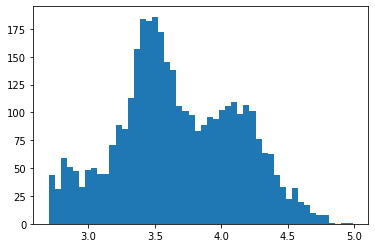

In [42]:
# Plot the histogram log10 molecule counts per cell. 
plt.hist(np.log10(ad.obs['total_counts']), 50)

In [43]:
# Remove cells with fewer than 1000 molecules and greater than 32000 molecules
use_cells = ad.obs_names[(np.log10(ad.obs['total_counts']) > np.log10(1000)) & \
    (np.log10(ad.obs['total_counts']) < np.log10(32000)) ] #creating a filter for cells with counts within our specified range
ad = ad[use_cells, :] #Using the created filter to redefine our experimental population

In [44]:
# How many cells are retained after this filter?
ad

View of AnnData object with n_obs × n_vars = 3268 × 20187
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

3268 cells are maintained after we filter out cells with fewer than 1000 molecules or greater than 32000 molecules.

## Mitochondrial fraction 

/opt/conda/envs/tfcb2022_rna/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


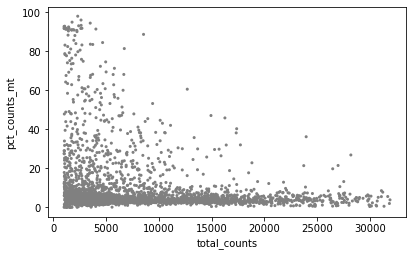

In [45]:
# Make a scatter plot with total_counts on the x-axis and pct_counts_mt on the y-axis
sc.pl.scatter(ad, x='total_counts', y='pct_counts_mt')

In [46]:
# How many cells do you find with a mitochondrial percentage > 20%
many_mitochondria = ad[ad.obs['pct_counts_mt'] > 20,:] #similar to above, creating a new condition only containing cells that have >20% mitochondira RNA content
many_mitochondria

View of AnnData object with n_obs × n_vars = 343 × 20187
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

We find that there are 343 cells that have a percentage of mitochondrial genes greater than 20% of their total sequenced genes.

In [47]:
# Remove cells with mitochondrial percentage > 20%
ad = ad[ad.obs['pct_counts_mt'] < 20,:] #also similar to above, using mitochondrial RNA content as a filter to remove cells with >20% mitochondrial RNA
ad

View of AnnData object with n_obs × n_vars = 2925 × 20187
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

## Additional information

The following methods take a more principled approach to identify cell-containing barcodes
* [EmptyDrops](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1662-y)
* [SoupX](https://academic.oup.com/gigascience/article/9/12/giaa151/6049831)
* [DecontX](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-1950-6)


# Preprocess the data - 10 points

In [48]:
# Normalize the cells to correct for molecule count and perform log transformation
sc.pp.normalize_total(ad) #normalizes the data
sc.pp.log1p(ad) #log transforms the data

/opt/conda/envs/tfcb2022_rna/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [49]:
ad #visualizing the data readout after our transformations (not necessary)

AnnData object with n_obs × n_vars = 2925 × 20187
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

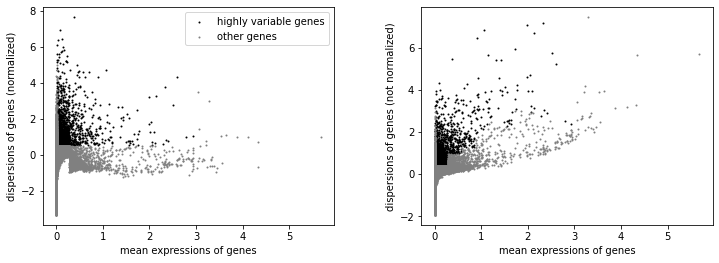

In [50]:
# Select highly variable genes and visaluze them
sc.pp.highly_variable_genes(ad) #calculates the highly variable genes for our population ad
sc.pl.highly_variable_genes(ad) #plots the highly variable genes for our population ad

In [51]:
# How many genes were chosen to be highly variable?
count = np.count_nonzero(ad.var['highly_variable']) #creating an object containing the count of highly variable genes
print(count) #printing the value assigned above

3483


# Analysis - 45 points 

In [53]:
# Perform PCA on the normalized data [PCA + plot - 5points ]
sc.pp.pca(ad) #performs the pca
ad #for my reference, prints the updated info below

AnnData object with n_obs × n_vars = 2925 × 20187
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

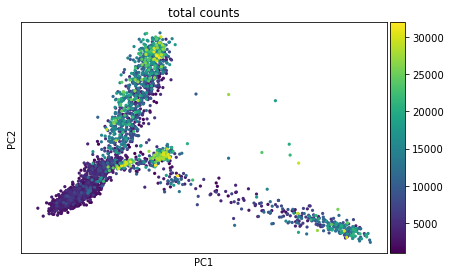

In [54]:
# Plot the first two PC components colored by total counts
sc.pl.scatter(ad, basis='pca', color=['total_counts']) #a scatter plot of the top two PCs, colored by total RNA counts

In [55]:
# Compute neighborhoods, clustering and umaps  - 
# Computing and plotting: 5 points 
sc.pp.neighbors(ad) #calculates neighbors
sc.tl.leiden(ad) #creates leiden groupings
sc.tl.umap(ad) #uses the UMAP algorythm to improve clustering of data

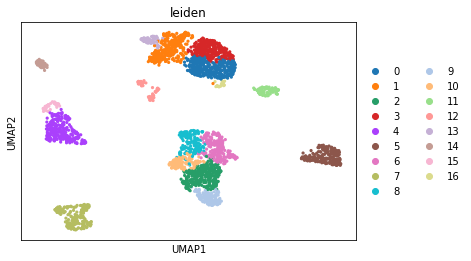

In [56]:
# Plot the umap colored leiden clusters 
sc.pl.umap(ad, color=['leiden']) #plots the calculated UMAP transformed data, from above. Colors using the leiden groupings.

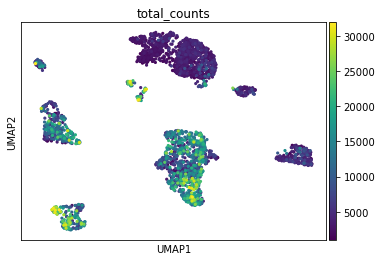

In [57]:
# Plot the umap colored by total counts 
sc.pl.umap(ad, color=['total_counts']) #changes the coloring to instead use the total RNA counts.

Here are the markers for different cell-types
* T-cells: CD3D
* B-cells: CD19
* Monocytes: FCER1G
* MAST cells: TPSB2
* Plasma cells: MZB1
* Epithelial: EPCAM
* Fibroblasts: CALD1
* Endothelial cells: SPARCL1


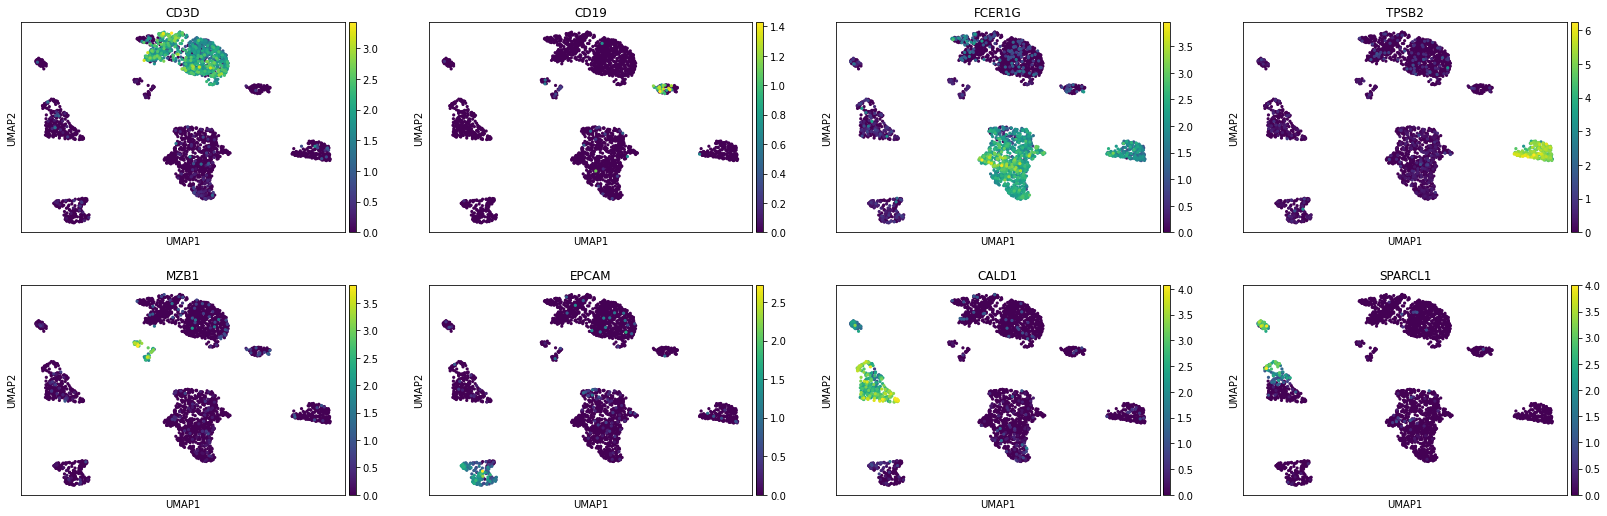

In [59]:
# Plot the expression of marker genes on umap - 5 points
sc.pl.umap(ad, color=['CD3D','CD19','FCER1G', 'TPSB2','MZB1','EPCAM','CALD1','SPARCL1']) #Creates the same UMAP as above, but now colors each based on genes that can help us delineate cell populations

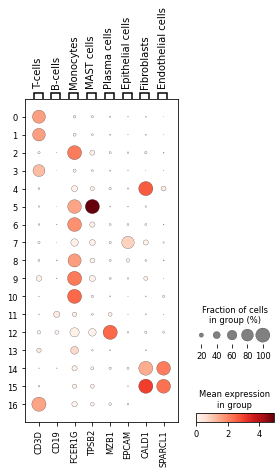

In [60]:
# Make a dotplot of these markers for each cluster - 5 points
marker_genes_dict = {
    'T-cells': ['CD3D'],
    'B-cells': ['CD19'],
    'Monocytes': ['FCER1G'],
    'MAST cells': ['TPSB2'],
    'Plasma cells': ['MZB1'],
    'Epithelial cells': ['EPCAM'],
    'Fibroblasts': ['CALD1'],
    'Endothelial cells': ['SPARCL1']
} #creates a dictionary of cell types and their associated highly expressed genes
sc.pl.dotplot(ad, marker_genes_dict, groupby='leiden') #creates a dotplot of our data (ad), showing out various cell types/gene expressions, and grouping by leiden.

In [71]:
# Use the visualization and dotplots to annotate each cluster with the cell-type - 
# A pandas series can be used for generating the mapping
# Two example of how this can be done is mentioned in the cell
# 20 points for cell type annotation and plotting
ct_annotations = pd.Series(dtype=object)
ct_annotations['0'] = 'T-cells'
ct_annotations['1'] = 'T-cells'
ct_annotations['2'] = 'Monocytes'
ct_annotations['3'] = 'T-cells'
ct_annotations['4'] = 'Fibroblasts'
ct_annotations['5'] = 'MAST cells'
ct_annotations['6'] = 'Monocytes'
ct_annotations['7'] = 'Epithelial cells'
ct_annotations['8'] = 'Monocytes'
ct_annotations['9'] = 'Monocytes'
ct_annotations['10'] = 'Monocytes'
ct_annotations['11'] = 'B-cells'
ct_annotations['12'] = 'Plasma cells'
ct_annotations['13'] = 'Monocytes'
ct_annotations['14'] = 'Endothelial cells'
ct_annotations['15'] = 'Fibroblasts'
ct_annotations['16'] = 'T-cells' #manually assigning each leiden cluster to one of the possible cell types using the above UMAP and dot plot.


In [72]:
# Assign cell-types to cells. Note this code will work only if all clusters are annotated
ad.obs['celltype'] = ct_annotations[ad.obs['leiden']].values #adding our generated assignments to our dataframe as 'celltype'

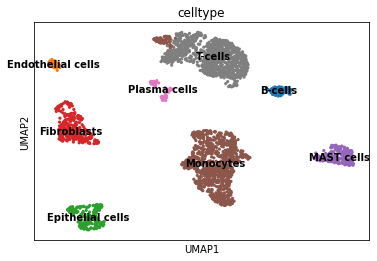

In [73]:
# Plot cell types on umap
sc.pl.umap(ad, color=['celltype'],legend_loc='on data') #plotting our UMAP from above, now coloring using our cell assignments. Legend moved to be on the plot.

## Extra credit (15 points) 
Write a procedure to automatically determine the cluster to cell-type annotations using marker gene expression. and cluster similarliy. 

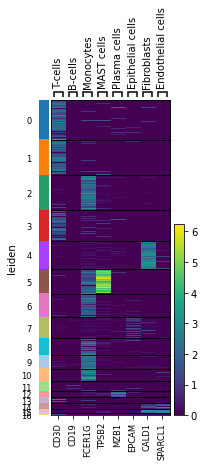

In [74]:
# Plot heatmap of marker genes per cell - 5 points

sc.pl.heatmap(ad, marker_genes_dict, groupby='leiden') #plots a heatmap of every cell, showing expression of genes that delineate clusters/cell types.

It is rather amazing that we can derive such heterogeneity from a single tumor biopsy !

## Additional information

There is a huge array of literature looking at different normalization techniques. Some interesting methods are 
* [SCtransform](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1874-1)
* [SCNorm](https://www.nature.com/articles/nmeth.4263)
* [GLM-PCA](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1861-6)

There are a number of deep-learning autencoder methods that start with count matrices and provide representations for visualization, clustering and other downstream analyses
* [scVI](https://www.google.com/search?client=safari&rls=en&q=scvi+single+cell&ie=UTF-8&oe=UTF-8)
* [DCA](https://www.nature.com/articles/s41467-018-07931-2)
* [Saucie](https://www.nature.com/articles/s41592-019-0576-7)


# Analysis of a subset - 20 points

Often times with single-cell data analysis, we will need to re-analyze a compartment to understand the structure better. In this section, the goal is to zoom into the epithelial compartment. 

In [75]:
# Create a new anndata object called "sub_ad" with only T-cells
sub_ad = ad[ad.obs['celltype'] == 'T-cells', :] #drill down our data to only keep cells we identified as T-cells
sub_ad #show our new data

View of AnnData object with n_obs × n_vars = 1003 × 20187
    obs: 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'celltype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

<b> Questions - 5 points</b>
* Should the data be normalized again ?
* Why or why not ? 

The data do not need to be normalized again. We normalized our reads above with no bias towards one cell population or another, so our prior normalization set out to determine relative gene abundances (primarily taking into account the different sizes of genes, therefore accounting for larger genes having more reads). If we had normalized to a particular population, then going back to raw data and re-normalizing here would be appropriate.

/opt/conda/envs/tfcb2022_rna/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


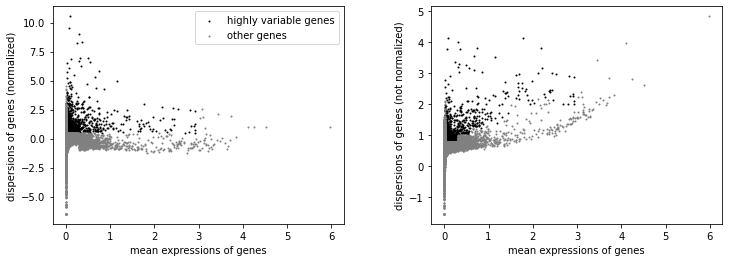

In [76]:
# Recompute the highly variable genes for this subset of cells
# Question: Why is this necessary
sc.pp.highly_variable_genes(sub_ad) #re-calculates the most highly variable genes
sc.pl.highly_variable_genes(sub_ad) #plots the most highly variable genes


Recalculating the highly variable genes is necessary because we have changed our population in question. The genes that differentiate T-cells from B-cells from monocytes may be different in this population, but the more likely scenario is that the genes that will tease apart differences within our T-cell compartment won't be those genes and instead will be other, T-cell specific genes (FoxP3, CD4, CD8, etc.).

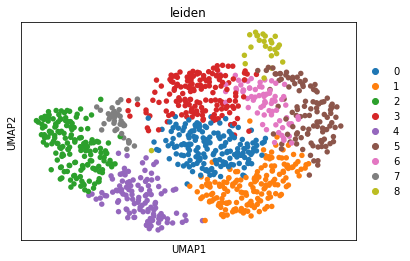

In [78]:
# Perform PCA and compute clusters and umap
sc.pp.pca(sub_ad) #calculates principal component analysis
sc.pp.neighbors(sub_ad) #calculate neighbors
sc.tl.leiden(sub_ad) #generate leiden clustering
sc.tl.umap(sub_ad) #run UMAP clustering algorythm.
sc.pl.umap(sub_ad, color=['leiden']) #plot UMAP coloring by leiden groupings.

In [79]:
# Identify differentially expressed genes per cluster
sc.tl.rank_genes_groups(sub_ad, groupby='leiden') #calculates the most differentially expressed genes by leiden cluster.

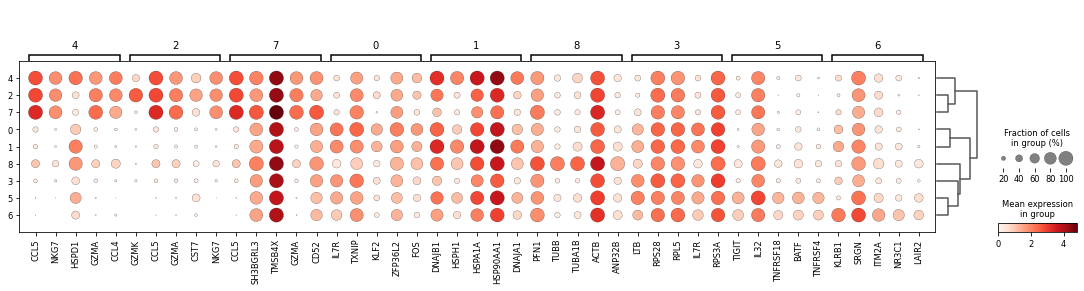

In [81]:
# Plot the top 5 genes per cluster as a dotplot
sc.tl.dendrogram(sub_ad, 'leiden') # This command is necessary since the clusters were re-computed
sc.pl.rank_genes_groups_dotplot(sub_ad, n_genes=5) #plots our 5 most differentially expressed genes per grouping 

# Batch correction (Extra credit) - 10 points

In this section, the goal is to batch correct data from two normal samples. 

In [82]:
# Load the anndata 
norm_ad = sc.read('data/RU675_RU682.h5ad') #read in appropriate data

In [83]:
# The preprocessing and analysis steps are already done in this anndata object
norm_ad #looking at our newly imported data, all of the requisite preprocessing has already been done

AnnData object with n_obs × n_vars = 6620 × 17287
    obs: 'sample', 'batch', 'celltype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_counts', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

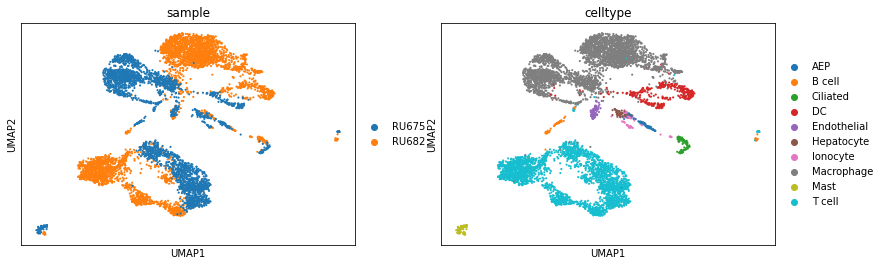

In [86]:
# Visualize the sample and cell type on the already computed umaps
sc.pl.umap(norm_ad, color=['sample','celltype']) #plots the calculated UMAP for this data, coloring by sample and by celltypes.

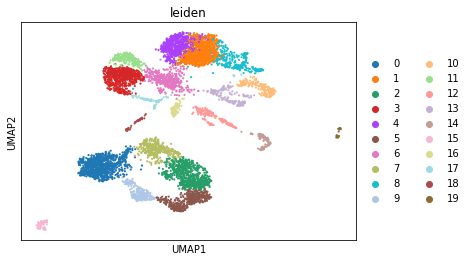

In [87]:
# Visualize the clusters
sc.pl.umap(norm_ad, color=['leiden']) #same as above, but now coloring by the leiden clusters instead

In [88]:
# Save the pre-batch correction as leiden_pre_correction
norm_ad.obs['leiden_pre_correction'] = norm_ad.obs['leiden'] #creating a new component in the dataframe of "leiden pre correction", allowing us to compare against leiden after we batch correct.

In [91]:
# Apply batch correction using Harmony and re-computed UMAPs and clusters 
sc.external.pp.harmony_integrate(norm_ad, key='sample') #harmony batch correction, working to undo the differences in the sample category.

2022-12-05 18:26:09,975 - harmonypy - INFO - Iteration 1 of 10
2022-12-05 18:26:11,442 - harmonypy - INFO - Iteration 2 of 10
2022-12-05 18:26:12,910 - harmonypy - INFO - Iteration 3 of 10
2022-12-05 18:26:14,646 - harmonypy - INFO - Iteration 4 of 10
2022-12-05 18:26:15,992 - harmonypy - INFO - Iteration 5 of 10
2022-12-05 18:26:17,193 - harmonypy - INFO - Converged after 5 iterations


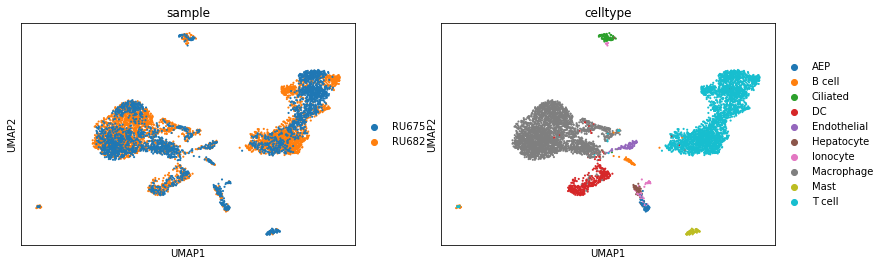

In [92]:
# Visualize the batch corrected-clusters and celltypes on batch-corrected umaps
sc.pp.neighbors(norm_ad, use_rep='X_pca_harmony') #recalculate neighbors on our harmony corrected data
sc.tl.leiden(norm_ad) #Calculate leiden clusters
sc.tl.umap(norm_ad) #run the UMAP grouping algorythm
sc.pl.umap(norm_ad, color=['sample', 'celltype']) #plot the newly calculate UMAP, coloring by sample and celltype


<b>Question</b>: What are you observations? 

While the initial UMAP had the orange and blue (corresponding to the two samples) segregating distinctly, our batch correction has merged samples so that they cluster together. This did not come at the expense of clustering by cell type. In fact, we show that if anything, correcting the batch effect merges the separate clusters called the same cell type we saw initially into more homogenous, single clusters!

## Extra credit - 10 points

In [130]:
pd.DataFrame(norm_ad.obs,index=norm_ad.obs['leiden'],columns=norm_ad.obs['leiden_pre_correction'])

leiden_pre_correction,4,0,7,1,14,1,1,12,1,4,...,2,5,3,15,11,12,14,16,6,2
leiden,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Goal - identify how the pre-batch correction clusters are reassigned after batch correction
# Compute a matrix where each row is the batch corrected cluster and each column is a pre-corrected cluster
# Each entry of the matrix should represent the number of cells in 
# each (pre-batch correction and post-correction) clusters
pd.DataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,825,0,0,70,0,0,0,0,0,0,0,0,0,0
1,841,0,1,9,0,17,7,0,0,0,0,0,0,0,0
2,0,9,374,0,338,0,0,0,0,2,0,0,0,0,0
3,545,0,0,6,0,1,70,0,0,0,0,0,0,0,0
4,10,0,0,549,0,17,0,0,0,0,0,0,0,0,0
5,0,0,467,0,0,0,0,0,0,0,0,0,0,0,0
6,6,0,0,3,0,395,0,2,1,0,0,0,0,0,0
7,0,329,0,0,20,1,0,0,0,0,0,0,0,0,0
8,6,0,0,0,0,3,277,0,0,0,0,0,0,0,0
9,0,0,49,0,42,0,0,0,0,127,0,0,0,0,0


<AxesSubplot:>

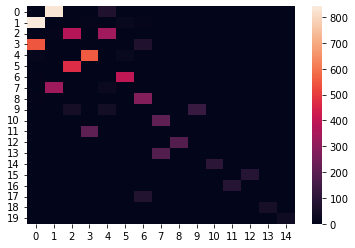

In [42]:
# Plot the count matrix as a heatmap 


In [43]:
# Normalize such that each row sums to 1 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.921788,0.000000,0.000000,0.078212,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.961143,0.000000,0.001143,0.010286,0.000000,0.019429,0.008000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.012448,0.517289,0.000000,0.467497,0.000000,0.000000,0.000000,0.000000,0.002766,0.0,0.0,0.0,0.000000,0.0
3,0.876206,0.000000,0.000000,0.009646,0.000000,0.001608,0.112540,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.017361,0.000000,0.000000,0.953125,0.000000,0.029514,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
5,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
6,0.014742,0.000000,0.000000,0.007371,0.000000,0.970516,0.000000,0.004914,0.002457,0.000000,0.0,0.0,0.0,0.000000,0.0
7,0.000000,0.940000,0.000000,0.000000,0.057143,0.002857,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
8,0.020979,0.000000,0.000000,0.000000,0.000000,0.010490,0.968531,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
9,0.000000,0.000000,0.224771,0.000000,0.192661,0.000000,0.000000,0.000000,0.000000,0.582569,0.0,0.0,0.0,0.000000,0.0


<AxesSubplot:>

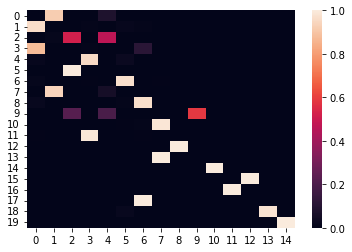

In [44]:
# Plot the count matrix as a heatmap 
